In [1]:
import pandas as pd
import numpy as np

import nltk

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

import os

In [2]:
df = pd.read_csv('data.csv')

In [3]:
X_data = df[['text_clean']].to_numpy().reshape(-1)
Y_data = df[['label']].to_numpy().reshape(-1)

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)

In [4]:
def vectorize(data, tfidf_vect_fit):
    X_tfidf = tfidf_vect_fit.transform(data)
    words = tfidf_vect_fit.get_feature_names_out()
    X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
    X_tfidf_df.columns = words
    return(X_tfidf_df)

In [5]:
tfidf_vect = TfidfVectorizer(analyzer = lambda x: nltk.word_tokenize(x))
tfidf_vect_fit = tfidf_vect.fit(X_train)
X_train = vectorize(X_train, tfidf_vect_fit)

In [7]:
forest = RandomForestClassifier(
    n_estimators = 200,
    min_samples_leaf = 2,
    oob_score = True,
    n_jobs = -1,
    max_depth = None
)
forest.fit(X_train, Y_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=200, n_jobs=-1,
                       oob_score=True)

In [8]:
X_test = vectorize(X_test, tfidf_vect_fit)

forest.score(X_test, Y_test)

0.661026837806301

In [9]:
Y_pred = forest.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.661026837806301


In [10]:
precision = precision_score(Y_test, Y_pred, average='micro')
print(f"Precision: {precision}")

Precision: 0.661026837806301


In [11]:
recall = recall_score(Y_test, Y_pred, average='micro')
print(f"Recall: {recall}")

Recall: 0.661026837806301


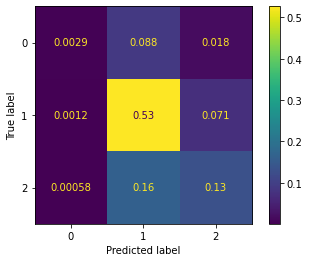

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    Y_test,
    Y_pred,
    normalize = 'all'
)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0a860f2d-c036-4b61-8b0f-a2fa5b54fb03' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>